## Lab: Predicting Left-Handedness from Psychological Factors

lab process:
1. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.


---
## Step 1: Obtain the data.

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix,accuracy_score, plot_confusion_matrix, plot_roc_curve, roc_auc_score

In [3]:
df = pd.read_csv('./data.csv', sep='\t')
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,...,US,2,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,...,CA,2,1,14,1,2,2,6,1,1
2,1,2,1,1,5,4,3,2,1,4,...,NL,2,2,30,4,1,1,1,1,2
3,1,4,1,5,1,4,5,4,3,5,...,US,2,1,18,2,2,5,3,2,2
4,5,1,5,1,5,1,5,1,3,1,...,US,2,1,22,3,1,1,3,2,3


---
## Step 2: Explore the data.


In [4]:
# include = 'all' to summarize quantitative and qualitative variables
df.describe(include = 'all')

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
count,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,...,4184,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.962715,3.829589,2.846558,3.186902,2.865440,3.672084,3.216539,3.184512,2.761233,3.522945,...,NaN,1.576243,1.239962,30.370698,2.317878,1.654398,1.833413,5.013623,2.394359,1.190966
std,1.360291,1.551683,1.664804,1.476879,1.545798,1.342238,1.490733,1.387382,1.511805,1.242890,...,NaN,0.494212,0.440882,367.201726,0.874264,0.640915,1.303454,1.970996,2.184164,0.495357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000,1.000000,3.000000,...,NaN,1.000000,1.000000,18.000000,2.000000,1.000000,1.000000,5.000000,1.000000,1.000000
50%,1.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,...,NaN,2.000000,1.000000,21.000000,2.000000,2.000000,1.000000,6.000000,2.000000,1.000000
75%,3.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,...,NaN,2.000000,1.000000,27.000000,3.000000,2.000000,2.000000,6.000000,2.000000,1.000000


In [5]:
df.isnull().sum().sort_values()

Q1             0
Q31            0
Q32            0
Q33            0
Q34            0
Q35            0
Q36            0
Q37            0
Q38            0
Q39            0
Q40            0
Q41            0
Q30            0
Q42            0
Q44            0
introelapse    0
testelapse     0
country        0
fromgoogle     0
engnat         0
age            0
education      0
gender         0
orientation    0
race           0
Q43            0
Q29            0
Q28            0
Q27            0
Q2             0
Q3             0
Q4             0
Q5             0
Q6             0
Q7             0
Q8             0
Q9             0
Q10            0
Q11            0
Q12            0
Q13            0
Q14            0
Q15            0
Q16            0
Q17            0
Q18            0
Q19            0
Q20            0
Q21            0
Q22            0
Q23            0
Q24            0
Q25            0
Q26            0
religion       0
hand           0
dtype: int64

In [43]:
df[(df['age'] == 23763)]

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
2690,2,5,5,1,5,5,5,5,4,2,...,US,2,2,23763,4,1,2,7,7,0


---
## Step 3: Models and parameters optimization


We want to predict whether or not a person is left-handed. Looking at `df['hand'].value_counts()`, we have four categories. Instead, I want to convert everything to 1s and 0s. Specifically, I'll map `2` (left-handed) to be `1` and I'll map everything else (`0`, `1`, `3`) to be `0`.


In [44]:
df['hand'].value_counts()

1    3542
2     452
3     179
0      11
Name: hand, dtype: int64

In [45]:
df = df[df.hand != 0]
df['hand'].value_counts()

1    3542
2     452
3     179
Name: hand, dtype: int64

In [6]:
df['y'] = [1 if i == 2 else 0 for i in df['hand']]
df['y'].value_counts() # weight is not balanced. So need use scoring='f1_weighted' in pipeline

0    3732
1     452
Name: y, dtype: int64

In [7]:
df = df[df['hand'] != 0].reset_index()
df.head()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand,y
0,0,4,1,5,1,5,1,5,1,4,...,2,1,22,3,1,1,3,2,3,0
1,1,1,5,1,4,2,5,5,4,1,...,2,1,14,1,2,2,6,1,1,0
2,2,1,2,1,1,5,4,3,2,1,...,2,2,30,4,1,1,1,1,2,1
3,3,1,4,1,5,1,4,5,4,3,...,2,1,18,2,2,5,3,2,2,1
4,4,5,1,5,1,5,1,5,1,3,...,2,1,22,3,1,1,3,2,3,0


In [8]:
df.columns

Index(['index', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
       'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30',
       'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40',
       'Q41', 'Q42', 'Q43', 'Q44', 'introelapse', 'testelapse', 'country',
       'fromgoogle', 'engnat', 'age', 'education', 'gender', 'orientation',
       'race', 'religion', 'hand', 'y'],
      dtype='object')

In [9]:
features = [col for col in df.columns if col!='hand']
X = df[features]
y = df['y']
X.head()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,y
0,0,4,1,5,1,5,1,5,1,4,...,US,2,1,22,3,1,1,3,2,0
1,1,1,5,1,4,2,5,5,4,1,...,CA,2,1,14,1,2,2,6,1,0
2,2,1,2,1,1,5,4,3,2,1,...,NL,2,2,30,4,1,1,1,1,1
3,3,1,4,1,5,1,4,5,4,3,...,US,2,1,18,2,2,5,3,2,1
4,4,5,1,5,1,5,1,5,1,3,...,US,2,1,22,3,1,1,3,2,0


In [10]:
y.value_counts(normalize=True) # it's not balanced !

0    0.891685
1    0.108315
Name: y, dtype: float64

In [12]:
# stratify on y data so that we don't have a surprisingly high or low number of `1` values in our training or testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 25, stratify = y)

In [13]:
numeric_features = X_train._get_numeric_data().columns.tolist()
#numeric_features


In [14]:
preprocessor = ColumnTransformer( transformers=[
    ('num', StandardScaler(), numeric_features), ])

---
## KNN Model

In [15]:
pipe = Pipeline([
    ('std', preprocessor),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('knn', KNeighborsClassifier())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('std',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['index', 'Q1', 'Q2', 'Q3',
                                                   'Q4', 'Q5', 'Q6', 'Q7', 'Q8',
                                                   'Q9', 'Q10', 'Q11', 'Q12',
                                                   'Q13', 'Q14', 'Q15', 'Q16',
                                                   'Q17', 'Q18', 'Q19', 'Q20',
                                                   'Q21', 'Q22', 'Q23', 'Q24',
                                                   'Q25', 'Q26', 'Q27', 'Q28',
                                                   'Q29', ...])])),
                ('onehot', OneHotEncoder(handle_unknown='ignore')),
                ('knn', KNeighborsClassifier())])

In [16]:
pipe.score(X_test, y_test)

0.9022988505747126

In [17]:
pipe.get_params()

{'memory': None,
 'steps': [('std',
   ColumnTransformer(transformers=[('num', StandardScaler(),
                                    ['index', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6',
                                     'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
                                     'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
                                     'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25',
                                     'Q26', 'Q27', 'Q28', 'Q29', ...])])),
  ('onehot', OneHotEncoder(handle_unknown='ignore')),
  ('knn', KNeighborsClassifier())],
 'verbose': False,
 'std': ColumnTransformer(transformers=[('num', StandardScaler(),
                                  ['index', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6',
                                   'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
                                   'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
                                   'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25',
               

In [68]:
# Fine-tune params

pipe_2 = Pipeline([
    ('std', preprocessor),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('knn', KNeighborsClassifier())
])

pipe_2_params = {'std__num__with_mean': [True, False], 
                 'std__num__with_std': [True, False],
                 'knn__p': [1, 2], 
                 'knn__weights': ['uniform', 'distance'],
                 'knn__metric': ['euclidean', 'manhattan','minkowski'],
                 'knn__n_neighbors': range(1, 51, 5)}

pipe_2_gridsearch = GridSearchCV(pipe_2, # What is the model we want to fit?
                                 pipe_2_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?
                                 verbose=1)

pipe_2_gridsearch.fit(X_train, y_train)
pipe_2_gridsearch.best_score_

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


0.9009288178913739

In [69]:
# Print out the set of hyperparameters that achieved the best score.
pipe_2_gridsearch.best_params_

{'knn__metric': 'euclidean',
 'knn__n_neighbors': 6,
 'knn__p': 1,
 'knn__weights': 'distance',
 'std__num__with_mean': True,
 'std__num__with_std': True}

In [70]:
# Evaluate the best fit model on the test data.
pipe_2_gridsearch.score(X_test, y_test)

0.9042145593869731

In [71]:
pipe_2_gridsearch.score(X_train, y_train)

1.0

---
## Logistic Regression Models


In [22]:
logreg = LogisticRegression()

pipe_0 = Pipeline([
    ('std', preprocessor),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('lg', logreg)
])

In [63]:
# define search space
space = dict()
space['lg__solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['lg__penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['lg__C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
# define search
search = GridSearchCV(pipe_0, 
                      space,
                      #scoring='accuracy',
                      scoring='f1_weighted',
                      n_jobs=-1, 
                      cv=5)
search.fit(X_train, y_train)
search.score(X_train, y_train)

/Users/zhangzhexu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/zhangzhexu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/zhangzhexu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/zhangzhexu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/zhangzhexu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/zhangzhexu/opt/ana

1.0

In [74]:
search.best_params_

{'lg__C': 1e-05, 'lg__penalty': 'none', 'lg__solver': 'newton-cg'}

In [64]:
search.score(X_test, y_test)

1.0

In [66]:
search.best_estimator_.named_steps["lg"].coef_

array([[-9.45811789e-03,  3.58079353e-02, -4.43352696e-03, ...,
        -1.50151747e-01, -1.65488885e+01,  1.64449858e+01]])

In [58]:
# search.best_estimator_.named_steps["lg"].coef_.shape
# len(search.best_estimator_.named_steps["onehot"].get_feature_names())

(1, 4503)

In [67]:
search.predict(X)

array([0, 0, 1, ..., 0, 0, 0])

In [62]:
search.best_estimator_.named_steps["lg"]

LogisticRegression(C=1e-05, penalty='none', solver='newton-cg')

---
## Step 4: Evaluate the model(s).


In [34]:
y_pred=search.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [72]:
y_k=pipe_2_gridsearch.predict(X_test)
accuracy_score(y_test, y_k)

0.9042145593869731

In [37]:
y_test.value_counts(normalize=True)

0    0.891762
1    0.108238
Name: y, dtype: float64

[[931   0]
 [  0 113]]


<AxesSubplot:>

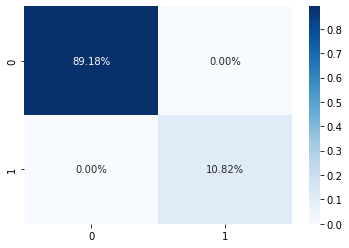

In [38]:
y_pred = search.predict(X_test)
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

/Users/zhangzhexu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


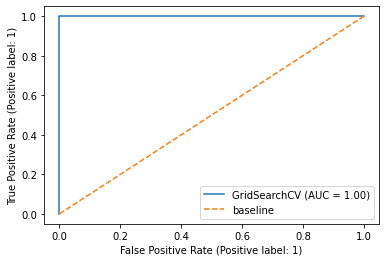

In [77]:
plot_roc_curve(search, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

[[931   0]
 [100  13]]


<AxesSubplot:>

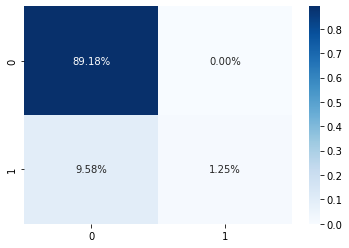

In [73]:
y_k=pipe_2_gridsearch.predict(X_test)
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_k)
print(cf_matrix)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

/Users/zhangzhexu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


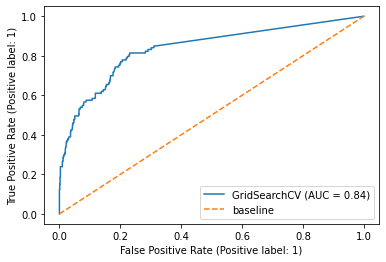

In [78]:
plot_roc_curve(pipe_2_gridsearch, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

Logistic Model is overfitting. (C is too small)

### To see result for various regularization hyperparameter (C) in logistic regression models

In [75]:
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lg__C,param_lg__penalty,param_lg__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.150219,0.012198,0.013144,0.004111,0.00001,none,newton-cg,"{'lg__C': 1e-05, 'lg__penalty': 'none', 'lg__s...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
1,0.085107,0.023345,0.012437,0.003583,0.00001,none,lbfgs,"{'lg__C': 1e-05, 'lg__penalty': 'none', 'lg__s...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2,0.028386,0.004279,0.000000,0.000000,0.00001,none,liblinear,"{'lg__C': 1e-05, 'lg__penalty': 'none', 'lg__s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,66
3,0.034950,0.010886,0.000000,0.000000,0.00001,l1,newton-cg,"{'lg__C': 1e-05, 'lg__penalty': 'l1', 'lg__sol...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,67
4,0.055511,0.009544,0.000000,0.000000,0.00001,l1,lbfgs,"{'lg__C': 1e-05, 'lg__penalty': 'l1', 'lg__sol...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.078360,0.020211,0.009502,0.003910,100,l2,lbfgs,"{'lg__C': 100, 'lg__penalty': 'l2', 'lg__solve...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
92,0.044344,0.005317,0.014753,0.008040,100,l2,liblinear,"{'lg__C': 100, 'lg__penalty': 'l2', 'lg__solve...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
93,0.030668,0.002135,0.000000,0.000000,100,elasticnet,newton-cg,"{'lg__C': 100, 'lg__penalty': 'elasticnet', 'l...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,50
94,0.030231,0.009422,0.000000,0.000000,100,elasticnet,lbfgs,"{'lg__C': 100, 'lg__penalty': 'elasticnet', 'l...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,89


## Conclusion
As we saw above, by changing the hyperparameter $C$ (or equivalently changing $\alpha$), we are getting the same model. This means that either our regularization has no effect on our model or that our regularization has such a strong effect that even regularizing a little bit would basically push our coefficients to zero.

In this case, our $X$ variables probably aren't very valuable in trying to predict $Y$. Because of this, it is not surprising that even a little bit of regularization (i.e. $\alpha = 1$) has a really substantial effect on the fit of our models. The fact that regularizing will give you the same answer provides more support to the claim that our $X$ variables are relatively worthless when trying to predict left-handedness.